In [15]:
import sys
import typing

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

import numpy as np
import pandas as pd

from vae.data.image_data import load_mnist, load_emnist, load_fashion_mnist
from vae.utils import save_model, model_path, exception_hook

from vae.models.simple_vae import run_model

from tqdm import tqdm

In [25]:
learning_rate = 1e-3
epochs = 40
batch_size = 128

train_loader, validation_loader, test_loader, dim = load_fashion_mnist(
    batch_size=batch_size,
)

hidden_dim = int(np.prod(dim) * 0.5)
latent_dim = int(np.prod(dim) * 0.25)

dim = np.prod(dim)

vae, stats = run_model(
    train_loader=train_loader,
    validation_loader=validation_loader,
    test_loader=test_loader,
    input_dim=dim,
    hidden_dim=hidden_dim,
    latent_dim=latent_dim,
    learning_rate=learning_rate,
    epochs=epochs,
)

Using device: cpu
Epoch 0 |Train Loss 302.05 | Validation Loss 269.16
Epoch 1 |Train Loss 262.02 | Validation Loss 256.13
Epoch 2 |Train Loss 253.14 | Validation Loss 250.0
Epoch 3 |Train Loss 250.05 | Validation Loss 247.89
Epoch 4 |Train Loss 247.97 | Validation Loss 246.26
Epoch 5 |Train Loss 246.62 | Validation Loss 245.53
Epoch 6 |Train Loss 245.66 | Validation Loss 244.03
Epoch 7 |Train Loss 244.7 | Validation Loss 243.45
Epoch 8 |Train Loss 244.09 | Validation Loss 243.41
Epoch 9 |Train Loss 243.52 | Validation Loss 242.14
Epoch 10 |Train Loss 243.14 | Validation Loss 242.0
Epoch 11 |Train Loss 242.73 | Validation Loss 241.94
Epoch 12 |Train Loss 242.31 | Validation Loss 241.21
Epoch 13 |Train Loss 241.81 | Validation Loss 240.54
Epoch 14 |Train Loss 241.58 | Validation Loss 240.52
Epoch 15 |Train Loss 241.27 | Validation Loss 240.3
Epoch 16 |Train Loss 241.03 | Validation Loss 239.89
Epoch 17 |Train Loss 240.76 | Validation Loss 239.91
Epoch 18 |Train Loss 240.66 | Validation L

<Axes: >

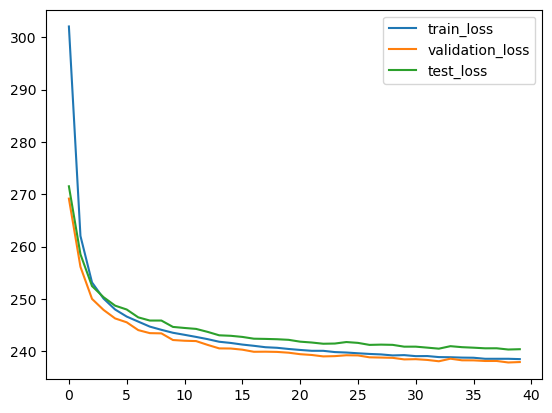

In [40]:
stats.loc[:, ["train_loss", "validation_loss", "test_loss"]].plot()

<Axes: >

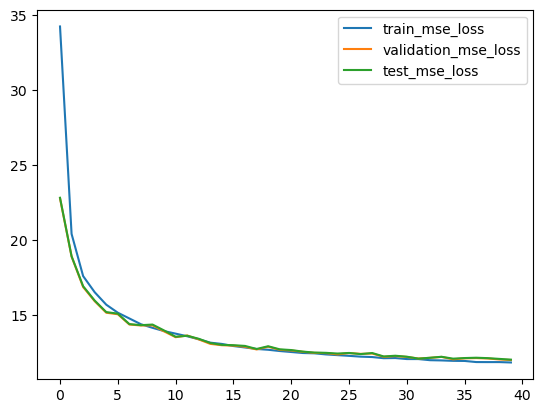

In [45]:
stats.loc[:, ["train_mse_loss", "validation_mse_loss", "test_mse_loss"]].plot()

In [27]:
model = vae
model

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=392, bias=True)
    (fc2): Linear(in_features=392, out_features=392, bias=True)
    (fc3_mu): Linear(in_features=392, out_features=196, bias=True)
    (fc3_logvar): Linear(in_features=392, out_features=196, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=196, out_features=392, bias=True)
    (fc2): Linear(in_features=392, out_features=392, bias=True)
    (fc3): Linear(in_features=392, out_features=784, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
)

In [31]:
import matplotlib.pyplot as plt

model.eval()

with torch.no_grad():
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, dim)
        x_hat, _, _ = model(x)


        break

def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

  0%|                                                                                                                                                                                                                             | 0/79 [00:00<?, ?it/s]


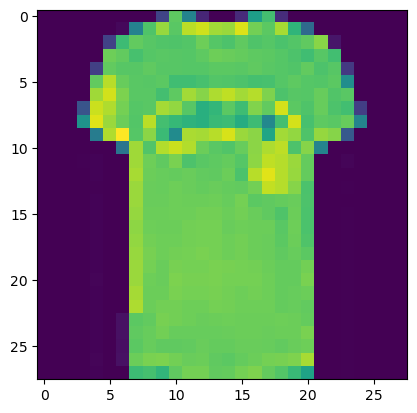

In [36]:
show_image(x, idx=19)

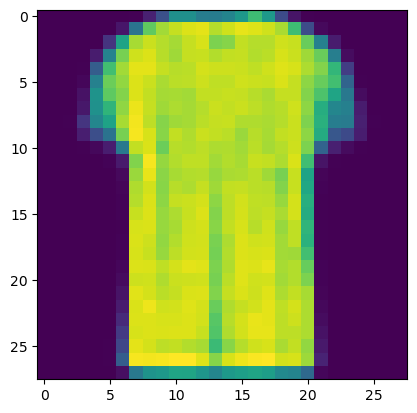

In [37]:
show_image(x_hat, idx=19)